# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [ ]:
import pandas 
data = pandas.read_csv('preprocessed_data.csv')


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import re
import pickle
import os
#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

In [ ]:
from sklearn.model_selection import train_test_split
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

## 1.3.1 encoding text features:essay,bag of words

## a. Applying BOW in text features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_essay_bow = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
a=vectorizer_essay_bow.fit(X_train['essay'].values)
X_train_essay_bow = vectorizer_essay_bow.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer_essay_bow.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer_essay_bow.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)





After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


## b.Applying TFIDF in text features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
text_tfidf = vectorizer.fit(X_train['essay'].values)
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf= vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)



After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3>1.4.1 encoding categorical features: School State</h3>

In [ ]:
vectorizer_school_state = CountVectorizer()
vectorizer_school_state.fit(X_train['school_state'].values) 

X_train_state_ohe = vectorizer_school_state.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer_school_state.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer_school_state.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_school_state.get_feature_names())


After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3>1.4.2 encoding categorical features: teacher_prefix</h3>

In [ ]:
vectorizer_teacher_prefix = CountVectorizer()
vectorizer_teacher_prefix.fit(X_train['teacher_prefix'].values) 
X_train_teacher_ohe = vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer_teacher_prefix.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_teacher_prefix.get_feature_names())


After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


<h3>1.4.3 encoding categorical features: project_grade_category</h3>

In [ ]:
vectorizer_project_grade_category = CountVectorizer()
vectorizer_project_grade_category.fit(X_train['project_grade_category'].values) 


X_train_grade_ohe = vectorizer_project_grade_category.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer_project_grade_category.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer_project_grade_category.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_project_grade_category.get_feature_names())


After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


# <h3>1.4.4 encoding categorical features: clean_categories</h3>

In [ ]:
vectorizer_clean_categories = CountVectorizer()
vectorizer_clean_categories.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories = vectorizer_clean_categories.transform(X_train['clean_categories'].values)
X_cv_clean_categories = vectorizer_clean_categories.transform(X_cv['clean_categories'].values)
X_test_clean_categories = vectorizer_clean_categories.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories.shape, y_train.shape)
print(X_cv_clean_categories.shape, y_cv.shape)
print(X_test_clean_categories.shape, y_test.shape)
print(vectorizer_clean_categories.get_feature_names())


After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


# <h3>1.4.5 encoding categorical features: clean_subcategories</h3>

In [ ]:
vectorizer_clean_subcategories = CountVectorizer()
vectorizer_clean_subcategories.fit(X_train['clean_subcategories'].values) 

X_train_clean_subcategories = vectorizer_clean_subcategories.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories = vectorizer_clean_subcategories.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories = vectorizer_clean_subcategories.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories.shape, y_train.shape)
print(X_cv_clean_subcategories.shape, y_cv.shape)
print(X_test_clean_subcategories.shape, y_test.shape)
print(vectorizer_clean_subcategories.get_feature_names())

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


## 1.4.6 encoding numerical features:price

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer_price = Normalizer()

X_train_price_norm = normalizer_price.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer_price.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer_price.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)



After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


## 1.4.7 encoding numerical features:teacher_number_of_previously_posted_projects

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

X_train_teacher_number_of_previously_posted_projects = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_number_of_previously_posted_projects = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects.shape, y_train.shape)
print(X_cv_teacher_number_of_previously_posted_projects.shape, y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects.shape, y_test.shape)


After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


##  set1:stacking all the features  

In [ ]:
from scipy.sparse import hstack
X_trset1 = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_categories,X_train_clean_subcategories, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects )).tocsr()
X_crset1 = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_clean_categories,X_cv_clean_subcategories, X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects)).tocsr()
X_teset1 = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_categories,X_test_clean_subcategories, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects )).tocsr()

print("Final Data matrix")
print(X_trset1.shape, y_train.shape)
print(X_crset1.shape, y_cv.shape)
print(X_teset1.shape, y_test.shape)


Final Data matrix
(49041, 5101) (49041,)
(24155, 5101) (24155,)
(36052, 5101) (36052,)


## set2: stacking all the featurees

In [ ]:
from scipy.sparse import hstack
X_trset2= hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_clean_categories,X_train_clean_subcategories, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects )).tocsr()
X_crset2 = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe,X_cv_clean_categories,X_cv_clean_subcategories, X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects)).tocsr()
X_teset2 = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_clean_categories,X_test_clean_subcategories, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects )).tocsr()

print("Final Data matrix")
print(X_trset2.shape, y_train.shape)
print(X_crset2.shape, y_cv.shape)
print(X_teset2.shape, y_test.shape)


Final Data matrix
(49041, 5101) (49041,)
(24155, 5101) (24155,)
(36052, 5101) (36052,)


<h2>1.5 Appling NB on different kind of featurization </h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

## 1.5.1 set 1 model implementation

In [ ]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

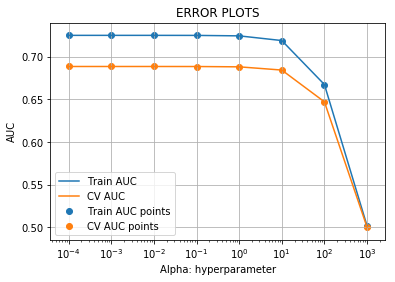

In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

train_auc = []
cv_auc = []
alpha_value = [0.0001,0.001,0.01,0.1,1,10,100,1000]
for i in alpha_value:
    naive_bayes= MultinomialNB(i)
    naive_bayes.fit(X_trset1, y_train)

    y_train_pred = batch_predict(naive_bayes, X_trset1)    
    y_cv_pred = batch_predict(naive_bayes, X_crset1)
    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.semilogx(alpha_value, train_auc, label='Train AUC')
plt.semilogx(alpha_value, cv_auc, label='CV AUC')

plt.scatter(alpha_value, train_auc, label='Train AUC points')
plt.scatter(alpha_value, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### 1.5.1.2 Testing the performance of the model on test data, plotting ROC Curves

In [ ]:
best_alpha=0.0001 #best aplha value

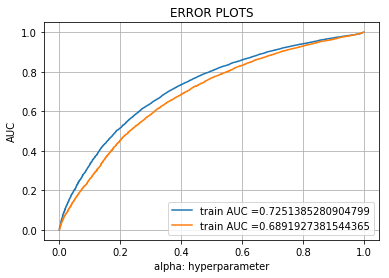

In [ ]:

from sklearn.metrics import roc_curve, auc


naive = MultinomialNB(alpha=best_alpha)
naive.fit(X_trset1, y_train)

y_train_pred = batch_predict(naive, X_trset1)    
y_test_pred = batch_predict(naive, X_teset1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.45051531876904144 for threshold 0.784
Train confusion matrix
[[ 4883  2543]
 [13103 28512]]
Test confusion matrix
[[ 3287  2172]
 [ 9723 20870]]


## 1.5.2 set 2 model implentation

In [ ]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

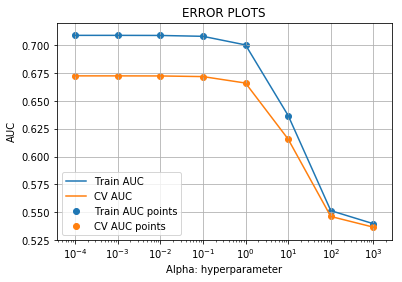

In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score


train_auc = []
cv_auc = []
alpha_value = [0.0001,0.001,0.01,0.1,1,10,100,1000]
for i in alpha_value:
    naive_bayes= MultinomialNB(i)
    naive_bayes.fit(X_trset2, y_train)

    y_train_pred = batch_predict(naive_bayes, X_trset2)    
    y_cv_pred = batch_predict(naive_bayes, X_crset2)
       
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.semilogx(alpha_value, train_auc, label='Train AUC')
plt.semilogx(alpha_value, cv_auc, label='CV AUC')

plt.scatter(alpha_value, train_auc, label='Train AUC points')
plt.scatter(alpha_value, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### 1.5.2.2 Testing the performance of the model on test data, plotting ROC Curves

In [ ]:
best_alpha=0.0001 #best aplha value

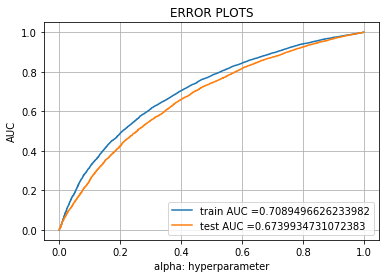

In [ ]:

from sklearn.metrics import roc_curve, auc


naive = MultinomialNB(alpha=best_alpha)
naive.fit(X_trset2, y_train)

y_train_pred = batch_predict(naive, X_trset2)    
y_test_pred = batch_predict(naive, X_teset2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.43020123514968417 for threshold 0.854
Train confusion matrix
[[ 5091  2335]
 [15501 26114]]
Test confusion matrix
[[ 3451  2008]
 [11474 19119]]


#  selecting the Top 20 features based on the optimum alpha value

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB(alpha=0.0001,class_prior=[0.5,0.5])
nb.fit(X_trset1,y_train)
class1_index=nb.feature_log_prob_[1,:].argsort()
class2_index=nb.feature_log_prob_[0,:].argsort()
a=vectorizer_essay_bow.get_feature_names()
b=vectorizer_school_state.get_feature_names()
c=vectorizer_teacher_prefix.get_feature_names()
d=vectorizer_project_grade_category.get_feature_names()
e=vectorizer_clean_categories.get_feature_names()
f=vectorizer_clean_subcategories.get_feature_names()
total_features_list=list(a+b+c+d+e+f+["teacher_number_of_previously_posted_projects"]+["price"])

class1_important_features=[]
class2_important_features=[]

for i in class1_index[-20:-1]:
    class1_important_features.append(total_features_list[i])
for i in class2_index[-20:-1]:
    class2_important_features.append(total_features_list[i])
print("class-->1 20 top features:\n")
print(class1_important_features)

print("\n")
print("class-->0 20 top features:\n")
print(class2_important_features)

class-->1 20 top features:

['price', 'use', 'need', 'work', 'reading', 'we', 'nannan', 'many', 'teacher_number_of_previously_posted_projects', 'help', 'learn', 'my students', 'they', 'not', 'the', 'classroom', 'learning', 'my', 'school']


class-->0 20 top features:

['love', 'price', 'come', 'work', 'need', 'we', 'many', 'nannan', 'teacher_number_of_previously_posted_projects', 'the', 'my students', 'help', 'they', 'learn', 'not', 'classroom', 'my', 'learning', 'school']


<h1>3. Summary</h1>



In [ ]:
import pandas as pd
summary_data={"vectorizer":["Bag of words","TFIDF"],"Model":["MultinomialNB","MultinomialNB"],"Hyperparameter":[0.0001,0.0001],"AUC":[0.689,0.673]}
data1=pd.DataFrame(summary_data)
data1

,vectorizer,Model,Hyperparameter,AUC
0,Bag of words,MultinomialNB,0.0001,0.689
1,TFIDF,MultinomialNB,0.0001,0.673
